<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/Financial_Fraud_Detection_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('financial_fraud_detection_dataset.csv')
df.head(11)

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601
5,T100005,2023-11-20T17:49:27.940971,ACC581141,ACC249811,58.77,transfer,entertainment,Berlin,atm,False,NaN,NaN,-1.63,19,0.40,UPI,112.70.252.46,D1790481
6,T100006,2023-11-11T11:15:41.359248,ACC757924,ACC267753,59.51,payment,travel,Dubai,pos,False,NaN,NaN,-2.62,1,0.68,UPI,58.136.174.57,D5924115
7,T100007,2023-06-09T06:32:36.945101,ACC103402,ACC857168,29.79,transfer,entertainment,London,atm,False,NaN,NaN,-0.48,5,0.37,ACH,82.0.165.250,D1326765
8,T100008,2023-02-11T06:57:40.585720,ACC972064,ACC945964,16.00,transfer,utilities,New York,web,False,NaN,NaN,0.99,3,0.98,card,64.65.243.84,D5446912
9,T100009,2023-07-13T09:25:20.560022,ACC543692,ACC322086,203.05,withdrawal,grocery,Dubai,atm,False,NaN,NaN,0.59,17,0.45,UPI,126.115.32.173,D1352896


In [ ]:
df.tail(11)

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
4999989,T5099989,2023-07-20T22:39:33.168467,ACC160795,ACC766028,8.06,transfer,other,Tokyo,pos,False,NaN,2545.403826,0.21,1,0.84,UPI,105.121.20.153,D2394301
4999990,T5099990,2023-09-05T21:25:22.217748,ACC322655,ACC290261,21.44,transfer,grocery,Singapore,atm,False,NaN,-2304.894781,-0.19,2,0.99,UPI,189.15.125.41,D7710231
4999991,T5099991,2023-05-16T13:16:11.027273,ACC713914,ACC440584,536.14,withdrawal,online,New York,web,False,NaN,2840.507076,-0.10,1,0.77,card,14.182.105.53,D3712619
4999992,T5099992,2023-02-27T14:17:06.605054,ACC226646,ACC512910,406.58,withdrawal,other,Singapore,web,False,NaN,1297.488572,1.91,12,0.62,ACH,53.103.40.178,D9807990
4999993,T5099993,2023-08-30T10:17:51.486456,ACC967197,ACC325133,28.67,payment,entertainment,Tokyo,web,False,NaN,1973.774350,-0.80,20,0.10,wire_transfer,197.252.167.194,D1030149
4999994,T5099994,2023-05-17T12:58:48.292037,ACC407454,ACC826561,306.99,withdrawal,grocery,Berlin,mobile,False,NaN,-2269.236180,-0.86,3,0.46,card,108.17.63.27,D2301835
4999995,T5099995,2023-11-17T23:20:29.746144,ACC597319,ACC749300,10.87,withdrawal,retail,Toronto,atm,False,NaN,1416.524233,-0.14,17,0.18,UPI,243.92.38.163,D4439579
4999996,T5099996,2023-09-23T11:23:20.659686,ACC749625,ACC709783,181.40,payment,grocery,Sydney,atm,False,NaN,999.089702,-1.79,4,0.58,wire_transfer,28.252.18.249,D5029311
4999997,T5099997,2023-11-18T00:52:34.527092,ACC629492,ACC680736,12.54,payment,utilities,New York,mobile,False,NaN,3871.584025,-0.30,6,0.99,card,111.199.174.121,D6333607
4999998,T5099998,2023-03-25T04:32:13.609837,ACC984720,ACC296935,376.29,deposit,restaurant,Dubai,pos,False,NaN,-4096.765453,-1.43,5,0.32,wire_transfer,221.110.215.14,D1551203


In [ ]:
df.shape

(5000000, 18)

In [ ]:
df.columns

Index(['transaction_id', 'timestamp', 'sender_account', 'receiver_account',
       'amount', 'transaction_type', 'merchant_category', 'location',
       'device_used', 'is_fraud', 'fraud_type', 'time_since_last_transaction',
       'spending_deviation_score', 'velocity_score', 'geo_anomaly_score',
       'payment_channel', 'ip_address', 'device_hash'],
      dtype='object')

In [ ]:
df.dtypes

,0
transaction_id,object
timestamp,object
sender_account,object
receiver_account,object
amount,float64
transaction_type,object
merchant_category,object
location,object
device_used,object
is_fraud,bool


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

In [ ]:
df.describe(include = 'all')

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
count,5000000,5000000,5000000,5000000,5.000000e+06,5000000,5000000,5000000,5000000,5000000,179553,4.103487e+06,5.000000e+06,5.000000e+06,5.000000e+06,5000000,5000000,5000000
unique,5000000,4999998,896513,896639,NaN,4,8,8,4,2,1,NaN,NaN,NaN,NaN,4,4997068,3835723
top,T5099983,2023-12-14T01:56:37.401698,ACC983922,ACC400278,NaN,deposit,retail,Tokyo,mobile,False,card_not_present,NaN,NaN,NaN,NaN,wire_transfer,194.9.139.47,D7441961
freq,1,2,20,23,NaN,1250593,626319,625994,1251131,4820447,179553,NaN,NaN,NaN,NaN,1251219,2,9
mean,NaN,NaN,NaN,NaN,3.589343e+02,NaN,NaN,NaN,NaN,NaN,NaN,1.525799e+00,-3.881160e-04,1.050132e+01,5.000293e-01,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,4.699333e+02,NaN,NaN,NaN,NaN,NaN,NaN,3.576569e+03,1.000807e+00,5.766842e+00,2.886349e-01,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e-02,NaN,NaN,NaN,NaN,NaN,NaN,-8.777814e+03,-5.260000e+00,1.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.657000e+01,NaN,NaN,NaN,NaN,NaN,NaN,-2.562376e+03,-6.800000e-01,5.000000e+00,2.500000e-01,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.386700e+02,NaN,NaN,NaN,NaN,NaN,NaN,8.442747e-01,0.000000e+00,1.100000e+01,5.000000e-01,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.038900e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.568339e+03,6.700000e-01,1.600000e+01,7.500000e-01,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
transaction_id,0
timestamp,0
sender_account,0
receiver_account,0
amount,0
transaction_type,0
merchant_category,0
location,0
device_used,0
is_fraud,0


In [ ]:
df = df.dropna(subset = ['fraud_type','time_since_last_transaction'])
df.isnull().sum()

,0
transaction_id,0
timestamp,0
sender_account,0
receiver_account,0
amount,0
transaction_type,0
merchant_category,0
location,0
device_used,0
is_fraud,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# Handling Outliers

In [ ]:
numerical_cols = ['transaction_amount', 'time_since_last_transaction', 'balance_after_transaction'] # Add other relevant numerical columns

for col in numerical_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

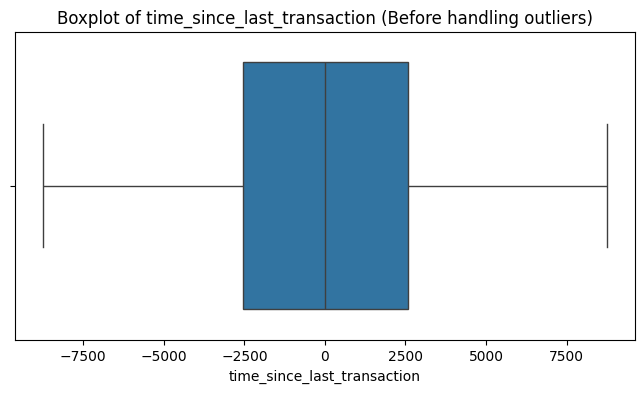

In [ ]:
numerical_cols_to_visualize = ['transaction_amount', 'time_since_last_transaction', 'balance_after_transaction'] # Use the same columns as before

for col in numerical_cols_to_visualize:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col} (Before handling outliers)')
        plt.show()

# Univariate Analysis

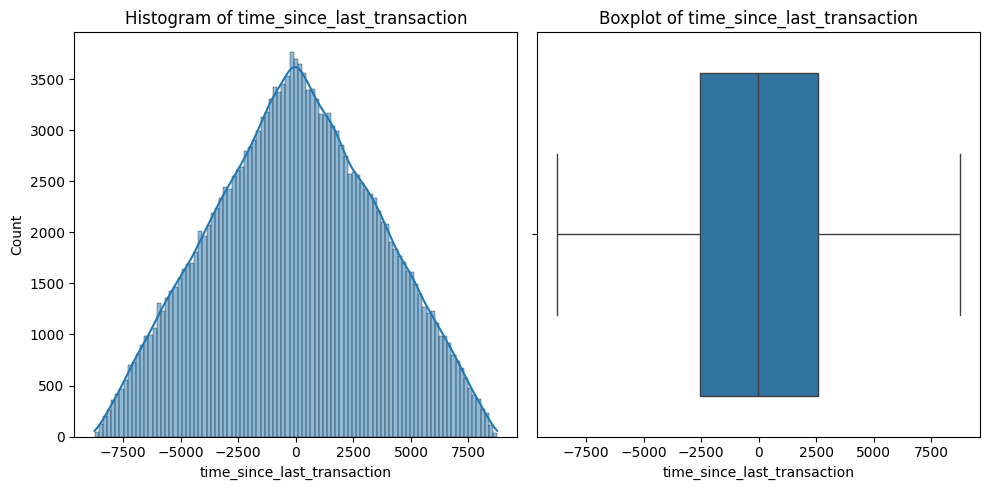

Descriptive Statistics for time_since_last_transaction:
count    179553.000000
mean          1.765372
std        3574.495194
min       -8748.166439
25%       -2554.253362
50%          -5.260870
75%        2575.459857
max        8744.774704
Name: time_since_last_transaction, dtype: float64
------------------------------


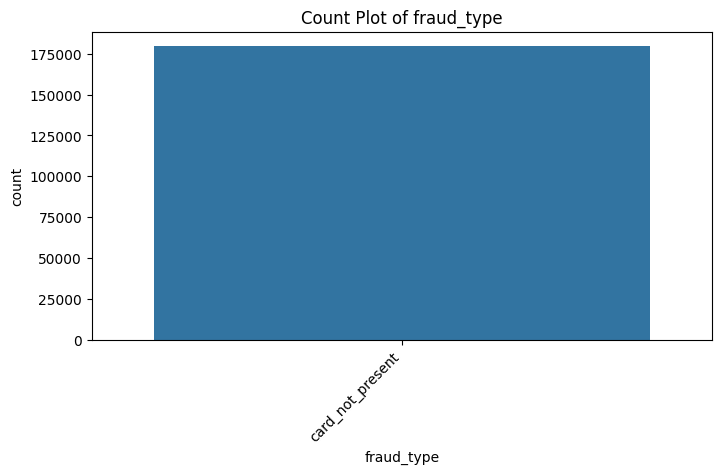

Value Counts for fraud_type:
fraud_type
card_not_present    179553
Name: count, dtype: int64
------------------------------


In [ ]:
numerical_cols_for_univariate = ['transaction_amount', 'time_since_last_transaction', 'balance_after_transaction']

for col in numerical_cols_for_univariate:
    if col in df.columns:
        plt.figure(figsize=(10, 5))

        # Histogram
        plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')

        # Box plot (useful for seeing distribution and potential outliers)
        plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()

        # Display descriptive statistics
        print(f"Descriptive Statistics for {col}:")
        print(df[col].describe())
        print("-" * 30)


# Example for categorical columns (assuming 'fraud_type' is categorical):
categorical_cols_for_univariate = ['fraud_type'] # Add other relevant categorical columns

for col in categorical_cols_for_univariate:
    if col in df.columns and df[col].dtype == 'object': # Check if the column exists and is an object type (likely categorical)
        plt.figure(figsize=(8, 4))
        sns.countplot(x=df[col])
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
        plt.show()

        # Display value counts
        print(f"Value Counts for {col}:")
        print(df[col].value_counts())
        print("-" * 30)

    elif col in df.columns and df[col].dtype != 'object':
         print(f"Column '{col}' is not of object dtype. Skipping count plot.")

# Visaulization

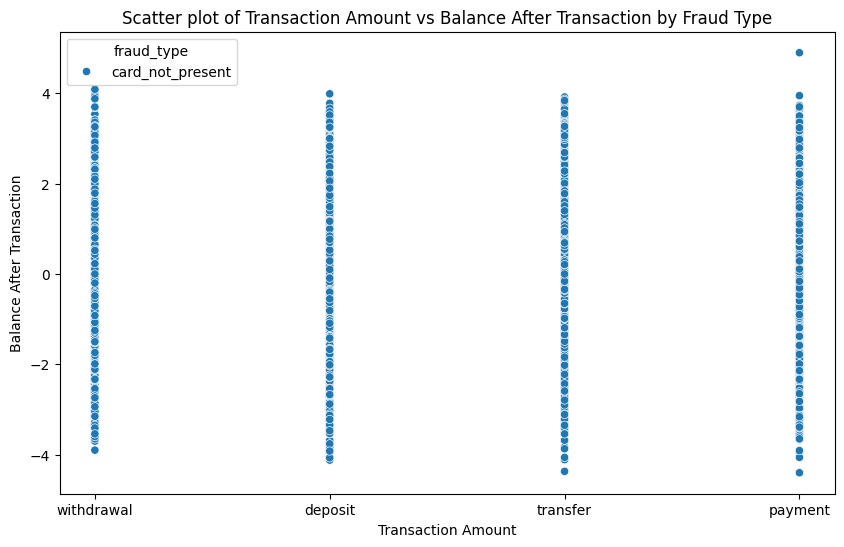

In [ ]:
plt.figure(figsize=(10, 6))
# Ensure the column name 'transaction_amount' is spelled correctly
sns.scatterplot(x='transaction_type', y='spending_deviation_score', hue='fraud_type', data=df)
plt.title('Scatter plot of Transaction Amount vs Balance After Transaction by Fraud Type')
plt.xlabel('Transaction Amount')
plt.ylabel('Balance After Transaction')

plt.show()

In [ ]:
sns.jointplot(x='transaction_id', y='time_since_last_transaction', data=df, kind='scatter')
plt.suptitle('Joint Plot of Transaction Amount and Time Since Last Transaction', y=1.02) # Adjust title position
plt.show()

In [ ]:
# Example with a hypothetical 'payment_method' column
    # Replace 'payment_method' with an actual categorical column from your dataset if available.
if 'payment_method' in df.columns and 'fraud_type' in df.columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(x='fraud_type', hue='payment_method', data=df)
  plt.title('Count Plot of Fraud Type by Payment Method')
  plt.xlabel('Fraud Type')
  plt.ylabel('Count')
  plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Thank you